In [137]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string
from scipy import signal
from scipy.signal import find_peaks

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 15000)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Prep behavioral data

#### Get anymaze data

In [138]:
path_meta = '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/EtOHStim.csv'

data_meta = pd.read_csv(path_meta)
data_meta = pd.DataFrame(data = data_meta)
print(data_meta.shape)
data_meta.head()

(36, 7)


,Animal,stage,time_FP,time_AM,Distance,group,diff
0,1153,OFB,12:15:32,12:21:11,15.964,1,-1
1,1154,OFB,13:00:57,13:06:20,7.770,1,-1
2,1155,OFB,9:22:17,9:27:38,20.168,2,-1
3,1157,OFB,13:23:46,13:30:05,23.159,2,-1
4,1158,OFB,14:09:57,14:15:38,13.913,2,-1


In [139]:
#get time diff in seconds
data_meta['start_AM'] = pd.to_datetime(data_meta['time_AM']) - pd.to_datetime(data_meta['time_FP'])

data_meta['start_AM']=data_meta['start_AM']/np.timedelta64(1,'s') + data_meta['diff'] 
data_meta['end_AM']=data_meta['start_AM']+900

data_meta

,Animal,stage,time_FP,time_AM,Distance,group,diff,start_AM,end_AM
0,1153,OFB,12:15:32,12:21:11,15.964,1,-1,338.0,1238.0
1,1154,OFB,13:00:57,13:06:20,7.770,1,-1,322.0,1222.0
2,1155,OFB,9:22:17,9:27:38,20.168,2,-1,320.0,1220.0
3,1157,OFB,13:23:46,13:30:05,23.159,2,-1,378.0,1278.0
4,1158,OFB,14:09:57,14:15:38,13.913,2,-1,340.0,1240.0
5,1159,OFB,12:37:56,12:43:29,24.226,2,-1,332.0,1232.0
6,1160,OFB,11:52:53,11:58:04,18.955,2,-1,310.0,1210.0
7,1161,OFB,13:46:59,13:52:58,13.615,1,-1,358.0,1258.0
8,1162,OFB,14:32:25,14:38:09,15.003,1,-1,343.0,1243.0
9,1163,OFB,15:51:49,15:58:17,15.855,1,-1,387.0,1287.0


In [114]:
pd.concat([data_meta.sort_values(['stage', 'Animal']), FP_df_end.sort_values(['task', 'animal'])], axis=1)

,Animal,stage,time_FP,time_AM,Distance,group,diff,start_AM,end_AM,task,animal,time
0,1153,OFB,12:15:32,12:21:11,15.964,1,-1,338.0,1238.0,OFB,1153,1174.44
1,1154,OFB,13:00:57,13:06:20,7.770,1,-1,322.0,1222.0,OFB,1154,1254.97
2,1155,OFB,9:22:17,9:27:38,20.168,2,-1,320.0,1220.0,OFB,1155,8845.18
3,1157,OFB,13:23:46,13:30:05,23.159,2,-1,378.0,1278.0,OFB,1157,1221.71
4,1158,OFB,14:09:57,14:15:38,13.913,2,-1,340.0,1240.0,OFB,1158,1184.64
5,1159,OFB,12:37:56,12:43:29,24.226,2,-1,332.0,1232.0,OFB,1159,1261.26
6,1160,OFB,11:52:53,11:58:04,18.955,2,-1,310.0,1210.0,OFB,1160,1193.05
7,1161,OFB,13:46:59,13:52:58,13.615,1,-1,358.0,1258.0,OFB,1161,1248.36
8,1162,OFB,14:32:25,14:38:09,15.003,1,-1,343.0,1243.0,OFB,1162,1224.23
9,1163,OFB,15:51:49,15:58:17,15.855,1,-1,387.0,1287.0,OFB,1163,1231.34


### Prep fiber photometry data

In [140]:
#create list of dir paths

path_FP = '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh'

dir_path_list = os.listdir(path_FP)

data_dir_paths = []
for directory in dir_path_list:
    int_path = path_FP + '/' + directory
    data_dir_paths.append(int_path)
    
data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB3.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1155_OFB3.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1155_OFB2.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB2.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1161_OFB2.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1160_OFB2.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1162_OFB.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1160_OFB3.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1161_OFB3.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1163_OFB.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1155_OFB.txt',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1161_OFB.txt',
 '/U

In [153]:
def create_FP_df(path):
        
    animal = int(path.split('/')[-1].split('_')[0])
    task = path.split('/')[-1].split('_')[1].split('.')[0]
    
    data_int = pd.read_table(path, sep='\t', header=None)
    data_int = pd.DataFrame(data = data_int)
    data_int.columns = ['time', 'signal', 'current', 'signal_raw', 'trash']
    #add animal
    data_int['animal'] = animal
    #add group
    data_int['group'] = data_meta[data_meta['Animal'] == data_int['animal'].unique()[0]]['group'].values[0]
    #add task
    data_int['task'] = task
    print(data_int.shape)
    
    #start analysis when animal is put in the box (get 5 min baseline in cage first)
    start_time = data_meta[(data_meta['Animal'] == animal) & (data_meta['stage'] == task)]['start_AM'].values[0]
    end_time = start_time + 900
    data_int = data_int[(data_int['time'] >= start_time) & (data_int['time'] < end_time)]
    
    #clean, create bin column, and add meta data
    data_int.drop(['signal_raw', 'trash'], axis=1, inplace=True)
    data_int['bin'] = pd.cut(data_int['time'], 15, labels=False)
    print(data_int.shape)
    
    return data_int
        

In [154]:
def process_peaks(df_meta, data_int):
    
    #detrend signal
    data_int['signal_detrend'] = signal.detrend(data_int['signal'])
    #compute robust z score 
    f_med = data_int['signal_detrend'].median()
    f_mad = data_int['signal_detrend'].mad()
    data_int['sig_z'] = (data_int['signal_detrend'] - f_med) / (f_mad)
    #find peaks
    x = data_int['sig_z']
    peak_index, peak_height = find_peaks(x, height=0, distance=50)
    
    return data_int, peak_index, peak_height


In [155]:
FP_df = pd.DataFrame()

for path in data_dir_paths:
    print(path)
    
    #get data
    data_int = create_FP_df(path)

    #get peaks
    data, peak_index, peak_height = process_peaks(data_meta, data_int)
    peak_df = pd.DataFrame(data=list(zip(peak_index, peak_height['peak_heights'])), columns=['peak_index', 'peak_height'])
    data = data.reset_index().reset_index().merge(peak_df, left_on='level_0', right_on='peak_index', how='outer')

    if FP_df.shape[0] == 0:
        FP_df = data
    else:
        FP_df = pd.concat([FP_df, data], axis=0)

print(FP_df.shape)
FP_df.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB3.txt
(123121, 8)
(88721, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1155_OFB3.txt
(138212, 8)
(82912, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB.txt
(125498, 8)
(90000, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1155_OFB2.txt
(127494, 8)
(84094, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1154_OFB2.txt
(118506, 8)
(83806, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1161_OFB2.txt
(117501, 8)
(83101, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1160_OFB2.txt
(126594, 8)
(90000, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1162_OFB.txt
(122424, 8)
(88124, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1160_OFB3.txt
(118528, 8)
(82728, 7)
/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/etoh/1161_OFB3.txt
(118435, 8)
(83935, 7)
/Users/abbieschindler/Documents/Schindler_

,level_0,index,time,signal,current,animal,group,task,bin,signal_detrend,sig_z,peak_index,peak_height
0,0,34400,344.00,36782,2.37537,1154,1,OFB3,0,124.987771,2.280661,NaN,NaN
1,1,34401,344.01,36776,2.29228,1154,1,OFB3,0,119.000420,2.172318,NaN,NaN
2,2,34402,344.02,36775,2.35094,1154,1,OFB3,0,118.013068,2.154452,NaN,NaN
3,3,34403,344.03,36766,2.34605,1154,1,OFB3,0,109.025717,1.991822,NaN,NaN
4,4,34404,344.04,36761,2.28251,1154,1,OFB3,0,104.038365,1.901574,NaN,NaN


In [ ]:
for animal in FP_df['animal'].unique():
    print(animal)
    plt.figure(figsize=(30,15))
    df_int = FP_df[(FP_df['animal'] == animal) & (FP_df['task'] == 'OFB3')]
    sns.lineplot(x='time', y='sig_z', data=df_int, ci=68)
    plt.show()

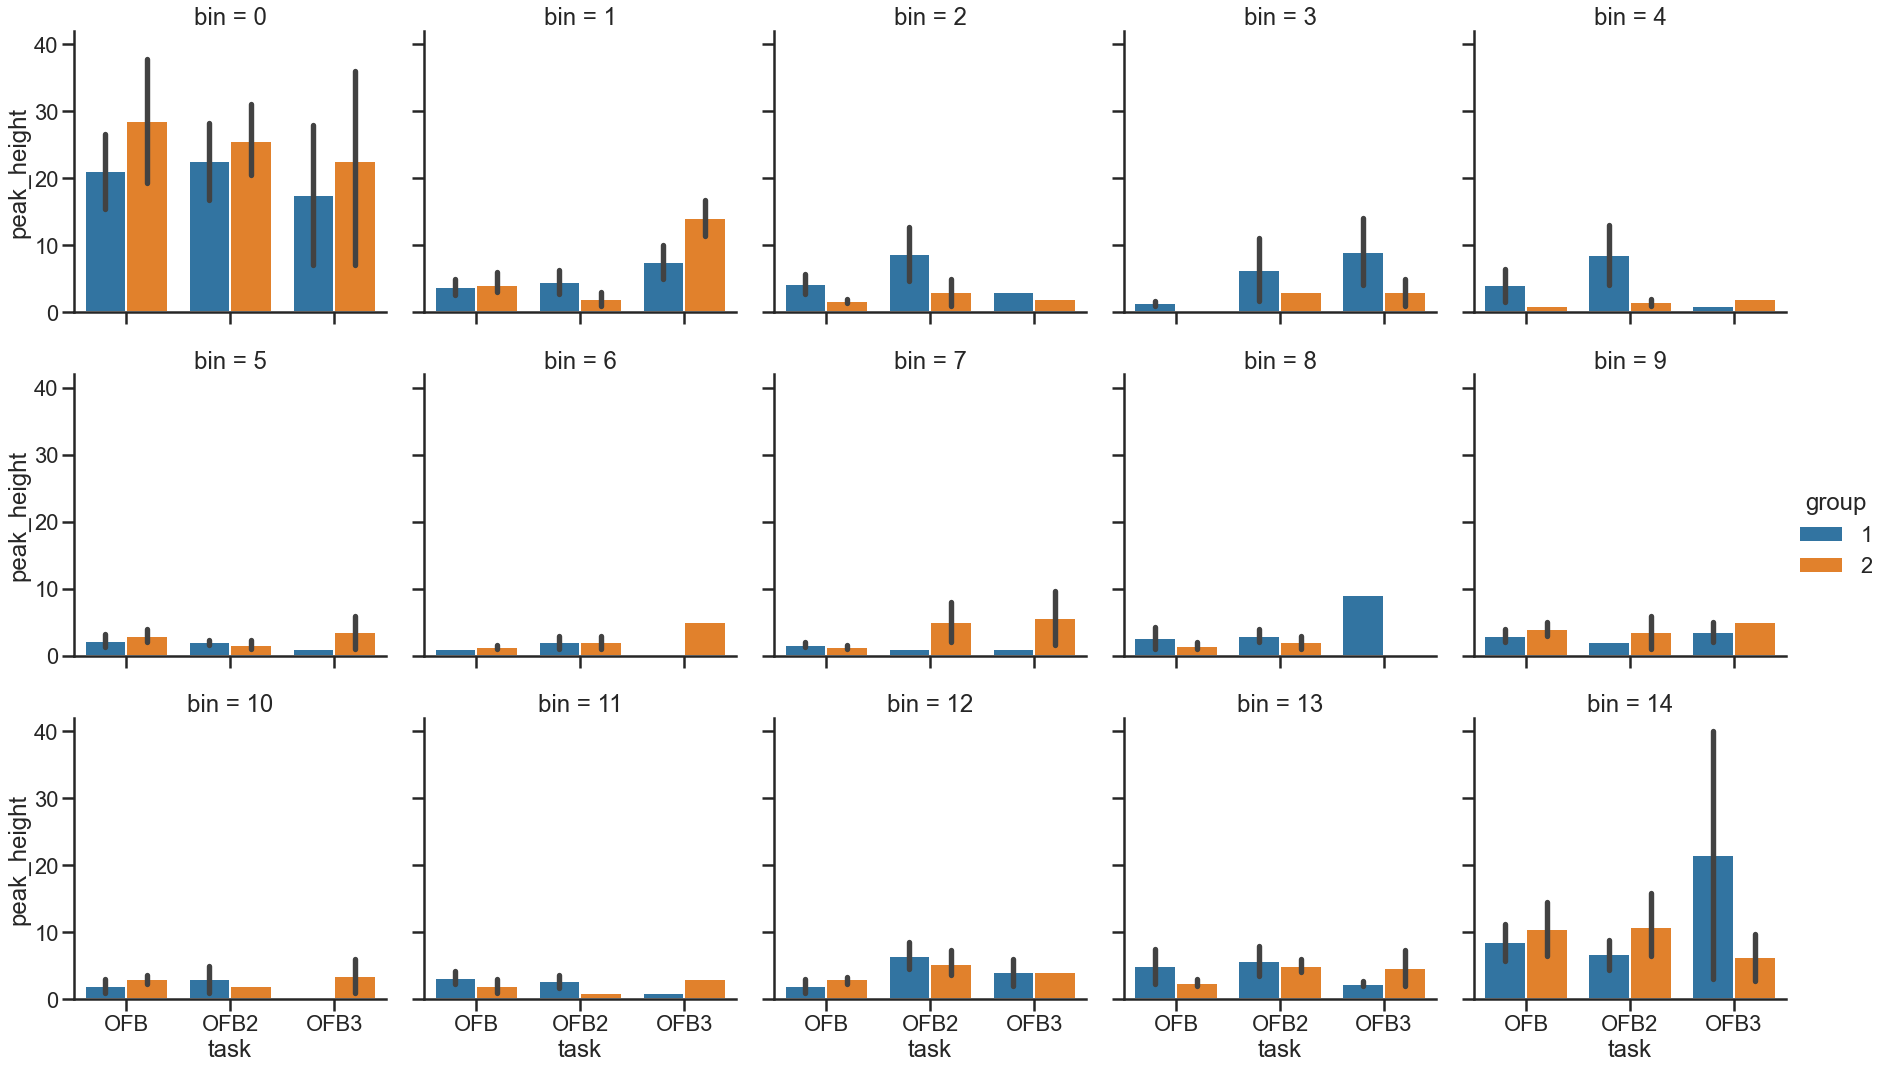

In [159]:
exclude = ['1155']
FP_df = FP_df[~FP_df['animal'].isin(exclude)]
FP_df_clean = FP_df[(FP_df['peak_height'] < 20) & (FP_df['peak_height'] >= 3)]

FP_df_count = FP_df_clean.groupby(['animal', 'group', 'bin', 'task'])['peak_height'].count().reset_index()
FP_df_mean = FP_df_clean.groupby(['animal', 'group', 'bin', 'task'])['peak_height'].mean().reset_index()

sns.catplot(x='task', y='peak_height', data=FP_df_count, hue='group', kind='bar', ci=68, col='bin', col_wrap=5)

In [ ]:
animal = int(data_dir_paths[0].split('/')[-1].split('_')[0])
task = data_dir_paths[0].split('/')[-1].split('_')[1].split('.')[0]
       
data = pd.read_table(data_dir_paths[0], sep='\t', header=None)
data = pd.DataFrame(data = data)
data.columns = ['time', 'signal', 'current', 'signal_raw', 'trash']
#add animal
data['animal'] = animal
#add group
data['group'] = data_meta[data_meta['Animal'] == data['animal'].unique()[0]]['group'].values[0]
#add task
data['task'] = task
print(data.shape)

#start analysis when animal is put in the box (get 5 min baseline in cage first)
start_time = data_meta[(data_meta['Animal'] == animal) & (data_meta['stage'] == task)]['start_AM'].values[0]
end_time = start_time + 600
data = data[(data['time'] >= start_time) & (data['time'] < end_time)]

data.drop(['signal_raw', 'trash'], axis=1, inplace=True)
data['bin'] = pd.cut(data['time'], 10, labels=False)

#detrend signal
data['signal_detrend'] = signal.detrend(data['signal'])
#compute robust z score 
f_med = data['signal_detrend'].median()
f_mad = data['signal_detrend'].mad()
data['sig_z'] = (data['signal_detrend'] - f_med) / (f_mad)
#find peaks
x = data['sig_z']
peak_index, peak_height = find_peaks(x, height=0, distance=50)

peak_df = pd.DataFrame(data=list(zip(peak_index, peak_height['peak_heights'])), columns=['peak_index', 'peak_height'])
data = data.reset_index().reset_index().merge(peak_df, left_on='level_0', right_on='peak_index', how='outer')
    
print(data.shape)
data.tail()